<h1>Loan Prediction Problem</h1>
<h2>Problem Statement</h2>
<ol>
    <li><b>About Company</b><br>
        Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and 
        rural areas. Customer first apply for home loan after that company validates the customer eligibility for 
        loan.</li>
    <li><b>Problem</b><br>
        Company wants to automate the loan eligibility process (real time) based on customer detail provided while 
        filling online application form. These details are Gender, Marital Status, Education, Number of Dependents,
        Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to 
        identify the customers segments, those are eligible for loan amount so that they can specifically target these 
        customers. Here they have provided a partial data set.</li>
</ol>

<h2>Libraries used</h2>
<ol>
    <li>NumPy, for vectorized calculations</li>
    <li>Matplotlib, for data visualization</li>
    <li>Pandas, for reading and manipulating the dataset</li>
    <li>Scikit-learn, for machine learning</li>
    <li>Keras, for deep learning</li>
    <li>Counter, for effecient dictionaries</li>
</ol>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter

<h2>Fetching the training and test datasets</h2>
<p>Using Pandas, we easily obtain the dataset from their respective CSV files.</p>

In [2]:
dataset = pd.read_csv('train.csv')
print(dataset.head())
print("*" * 50)
test_dataset = pd.read_csv('test.csv')
print(test_dataset.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

<h2>Contents of the dataset</h2>
<p>After fetching the dataset, we see the following information :-</p>
<ol>
    <li><b>Loan_ID</b> : Unique Loan ID</li>
    <li><b>Gender</b> :  Male/ Female</li>
    <li><b>Married</b> : Applicant married (Y/N)</li>
    <li><b>Dependents</b> : Number of dependents</li>
    <li><b>Education</b> : Applicant Education (Graduate/ Under Graduate)</li>
    <li><b>Self_Employed</b> : Self employed (Y/N)</li>
    <li><b>ApplicantIncome</b> : Applicant income</li>
    <li><b>CoapplicantIncome</b> : Coapplicant income</li>
    <li><b>LoanAmount</b> : Loan amount in thousands</li>
    <li><b>Loan_Amount_Term</b> : Term of loan in months</li>
    <li><b>Credit_History</b> : credit history meets guidelines</li>
    <li><b>Property_Area</b> : Urban/ Semi Urban/ Rural</li>
    <li><b>Loan_Status</b> : Loan approved (Y/N)</li>
</ol>

<h2>EDA Checklist</h2>
<ol>
    <li>What question(s) are you trying to solve (or prove wrong)?</li>
    <li>What kind of data do you have and how do you treat different types?</li>
    <li>What’s missing from the data and how do you deal with it?</li>
    <li>Where are the outliers and why should you care about them?</li>
    <li>How can you add, change or remove features to get more out of your data?</li>
</ol>

<h2>Getting information and cleaning each column</h2>
<p>Let's explore each column of the <b>training dataset</b> and perform following operations :-</p>
<ol>
    <li>Count the number of entries</li>
    <li>Count unique values in the column</li>
    <li>Show its description</li>
    <li>Check whether it contains NaN values or not</li>
    <li>If present, replace those values with :
        <ul>
            <li><i>Categorical column</i> : Most frequently occuring value in the column</li>
            <li><i>Numerical column</i> : Mean of all the values in the column</li>
        </ul>
    </li>
</ol>

<h2>Gender information</h2>

In [3]:
print("Gender information of applicants :- ")
print("Entries : ", dataset['Gender'].count())
print(dataset['Gender'].value_counts(), end='\n\n')
print(dataset['Gender'].describe(), end='\n\n')
print("Has NaNs : ", dataset['Gender'].hasnans)
print("Filling NaNs...")
dataset['Gender'].fillna('Male', inplace=True)
print("Has NaNs : ", dataset['Gender'].hasnans)

Gender information of applicants :- 
Entries :  601
Male      489
Female    112
Name: Gender, dtype: int64

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

Has NaNs :  True
Filling NaNs...
Has NaNs :  False


<h2>Marriage information</h2>

In [4]:
print("Marriage information of applicants :-")
print("Entries : ", dataset['Married'].count())
print(dataset['Married'].value_counts(), end='\n\n')
print(dataset['Married'].describe(), end='\n\n')
print("Has NaNs : ", dataset['Married'].hasnans)
print("Filling NaNs...")
dataset['Married'].fillna('Yes', inplace=True)
print("Has NaNs : ", dataset['Married'].hasnans)

Marriage information of applicants :-
Entries :  611
Yes    398
No     213
Name: Married, dtype: int64

count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object

Has NaNs :  True
Filling NaNs...
Has NaNs :  False


<h2>Dependents information</h2>

In [5]:
print("Dependents information :-")
print("Entries : ", dataset['Dependents'].count())
print(dataset['Dependents'].value_counts(), end='\n\n')
print(dataset['Dependents'].describe(), end='\n\n')
print("Has NaNs : ", dataset['Dependents'].hasnans)
print("Filling NaNs...")
dataset['Dependents'].fillna('0', inplace=True)
print("Has NaNs : ", dataset['Dependents'].hasnans)

Dependents information :-
Entries :  599
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

Has NaNs :  True
Filling NaNs...
Has NaNs :  False


<h2>Education information</h2>

In [6]:
print("Education information :-")
print("Entries : ", dataset['Education'].count())
print(dataset['Education'].value_counts(), end='\n\n')
print(dataset['Education'].describe(), end='\n\n')
print("Has NaNs : ", dataset['Education'].hasnans)
print("Filling NaNs...")
dataset['Education'].fillna('Graduate', inplace=True)
print("Has NaNs : ", dataset['Education'].hasnans)

Education information :-
Entries :  614
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object

Has NaNs :  False
Filling NaNs...
Has NaNs :  False


<h2>Self-employment information</h2>

In [7]:
print("Self-employed information :-")
print("Entries : ", dataset['Self_Employed'].count())
print(dataset['Self_Employed'].value_counts(), end='\n\n')
print(dataset['Self_Employed'].describe(), end='\n\n')
print("Has NaNs : ", dataset['Self_Employed'].hasnans)
print("Filling NaNs...")
dataset['Self_Employed'].fillna('No', inplace=True)
print("Has NaNs : ", dataset['Self_Employed'].hasnans)

Self-employed information :-
Entries :  582
No     500
Yes     82
Name: Self_Employed, dtype: int64

count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object

Has NaNs :  True
Filling NaNs...
Has NaNs :  False


<h2>Applicant Income information</h2>

In [8]:
print("Applicant Income information :-")
print("Entries : ", dataset['ApplicantIncome'].count())
print(dataset['ApplicantIncome'].describe(), end='\n\n')
print("Has NaNs : ", dataset['ApplicantIncome'].hasnans)

Applicant Income information :-
Entries :  614
count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

Has NaNs :  False


<h2>Coapplicant information</h2>

In [9]:
print("Coapplicant Income information :-")
print("Entries : ", dataset['CoapplicantIncome'].count())
print(dataset['CoapplicantIncome'].describe(), end='\n\n')
print("Has NaNs : ", dataset['CoapplicantIncome'].hasnans)

Coapplicant Income information :-
Entries :  614
count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

Has NaNs :  False


<h2>Loan amount information</h2>

In [10]:
print("Loan Amount information :-")
print("Entries : ", dataset['LoanAmount'].count())
print(dataset['LoanAmount'].describe(), end='\n\n')
print("Has NaNs : ", dataset['LoanAmount'].hasnans)
print("Filling NaNs...")
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(), inplace=True)
print("Has NaNs : ", dataset['LoanAmount'].hasnans)

Loan Amount information :-
Entries :  592
count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

Has NaNs :  True
Filling NaNs...
Has NaNs :  False


<h2>Loan term information</h2>

In [11]:
print("Loan Amount Term information :-")
print("Entries : ", dataset['Loan_Amount_Term'].count())
print(dataset['Loan_Amount_Term'].describe(), end='\n\n')
print("Has NaNs : ", dataset['Loan_Amount_Term'].hasnans)
print("Filling NaNs...")
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mean(), inplace=True)
print("Has NaNs : ", dataset['Loan_Amount_Term'].hasnans)

Loan Amount Term information :-
Entries :  600
count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

Has NaNs :  True
Filling NaNs...
Has NaNs :  False


<h2>Credit History information</h2>

In [12]:
print("Credit History information :-")
print("Entries : ", dataset['Credit_History'].count())
print(dataset['Credit_History'].value_counts(), end='\n\n')
print("Has NaNs : ", dataset['Credit_History'].hasnans)
print("Filling NaNs...")
dataset['Credit_History'].fillna(1.0, inplace=True)
print("Has NaNs : ", dataset['Credit_History'].hasnans)

Credit History information :-
Entries :  564
1.0    475
0.0     89
Name: Credit_History, dtype: int64

Has NaNs :  True
Filling NaNs...
Has NaNs :  False


<h2>Property type information</h2>

In [13]:
print("Property area information :-")
print("Entries : ", dataset['Property_Area'].count())
print(dataset['Property_Area'].value_counts(), end='\n\n')
print(dataset['Property_Area'].describe(), end='\n\n')
print("Has NaNs : ", dataset['Property_Area'].hasnans)

Property area information :-
Entries :  614
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object

Has NaNs :  False


<h2>Loan status information</h2>

In [14]:
print("Loan status information :-")
print("Entries : ", dataset['Loan_Status'].count())
print(dataset['Loan_Status'].value_counts(), end='\n\n')
print(dataset['Loan_Status'].describe(), end='\n\n')
print("Has NaNs : ", dataset['Loan_Status'].hasnans)

Loan status information :-
Entries :  614
Y    422
N    192
Name: Loan_Status, dtype: int64

count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object

Has NaNs :  False


<h2>Re-checking the training dataset</h2>
<p>After performing the cleaning operation for each column in the <b>training dataset</b>, let's get info of this dataset and check if there is any other operation required to do further</p>

In [15]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
None


<h2>Visualizing each column of the dataset</h2>
<p>Using Matplotlib, we are going to plot charts of following type :-</p>
<ul>
    <li><i>Categorical column</i> : Bar chart</li>
    <li><i>Numerical column</i> : Histogram</li>
</ul>

<h2>Visualizing Gender information</h2>

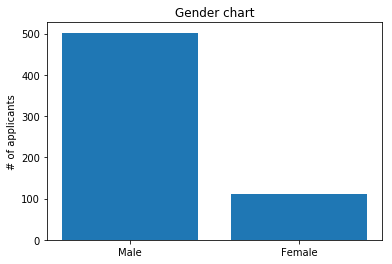

In [16]:
gender_data = Counter(dataset['Gender'])
plt.bar(gender_data.keys(), gender_data.values())
plt.title('Gender chart')
plt.ylabel('# of applicants')
plt.show()

<h2>Visualizing Marriage information</h2>

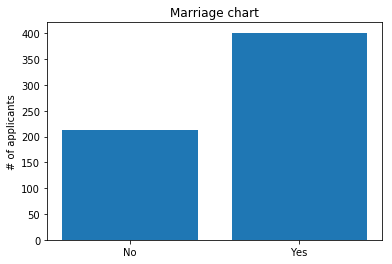

In [17]:
marriage_data = Counter(dataset['Married'])
plt.bar(marriage_data.keys(), marriage_data.values())
plt.title('Marriage chart')
plt.ylabel('# of applicants')
plt.show()

<h2>Visualizing Dependents information</h2>

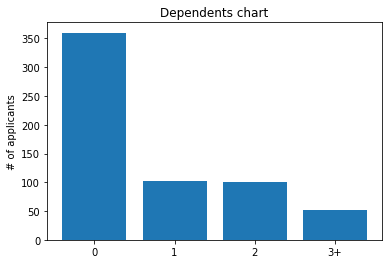

In [18]:
dependents_data = Counter(dataset['Dependents'])
plt.bar(dependents_data.keys(), dependents_data.values())
plt.title('Dependents chart')
plt.ylabel('# of applicants')
plt.show()

<h2>Visualizing Education information</h2>

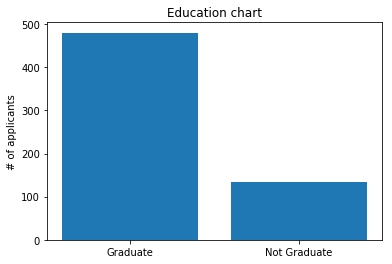

In [19]:
education_data = Counter(dataset['Education'])
plt.bar(education_data.keys(), education_data.values())
plt.title('Education chart')
plt.ylabel('# of applicants')
plt.show()

<h2>Visualizing Self-employment information</h2>

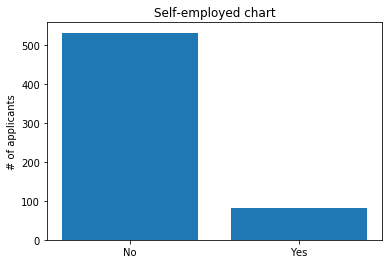

In [20]:
self_emp_data = Counter(dataset['Self_Employed'])
plt.bar(self_emp_data.keys(), self_emp_data.values())
plt.title('Self-employed chart')
plt.ylabel('# of applicants')
plt.show()

<h2>Visualizing Applicant income information</h2>

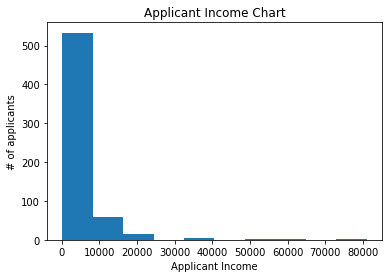

In [21]:
plt.hist(dataset['ApplicantIncome'])
plt.title('Applicant Income Char t')
plt.xlabel('Applicant Income')
plt.ylabel('# of applicants')
plt.show()

<h2>Visualizing Coapplicant income information</h2>

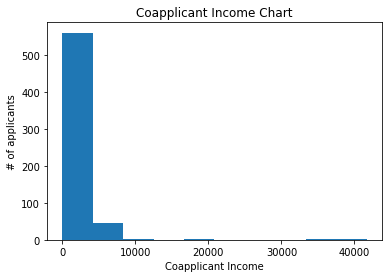

In [22]:
plt.hist(dataset['CoapplicantIncome'])
plt.title('Coapplicant Income Chart')
plt.xlabel('Coapplicant Income')
plt.ylabel('# of applicants')
plt.show()

<h2>Visualizing Loan amount information</h2>

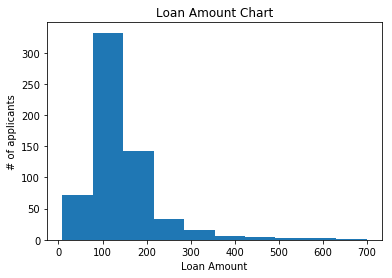

In [23]:
plt.hist(dataset['LoanAmount'])
plt.title('Loan Amount Chart')
plt.xlabel('Loan Amount')
plt.ylabel('# of applicants')
plt.show()

<h2>Visualizing Loan term information</h2>

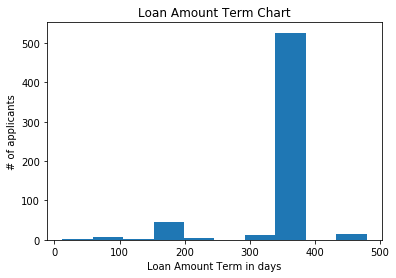

In [24]:
plt.hist(dataset['Loan_Amount_Term'])
plt.title('Loan Amount Term Chart')
plt.xlabel('Loan Amount Term in days')
plt.ylabel('# of applicants')
plt.show()

<h2>Visualizing Credit history information</h2>

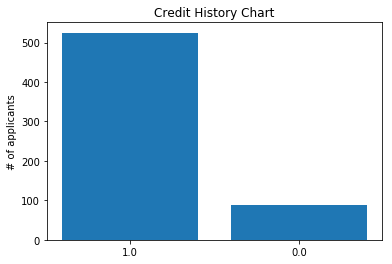

In [25]:
credit_history = Counter(dataset['Credit_History'])
names = [str(x) for x in credit_history.keys()]
plt.bar(names, credit_history.values())
plt.title('Credit History Chart')
plt.ylabel('# of applicants')
plt.show()

<h2>Visualizing Property type information</h2>

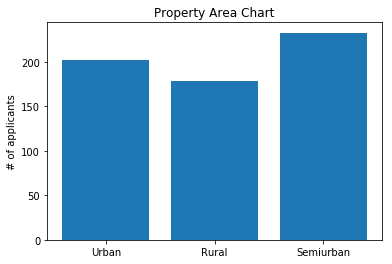

In [26]:
prop_area = Counter(dataset['Property_Area'])
plt.bar(prop_area.keys(), prop_area.values())
plt.title('Property Area Chart')
plt.ylabel('# of applicants')
plt.show()

<h2>Visualizing Loan status information</h2>

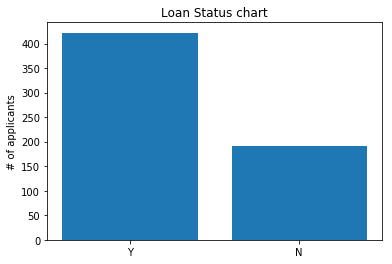

In [27]:
loan_grant_data = Counter(dataset['Loan_Status'])
plt.bar(loan_grant_data.keys(), loan_grant_data.values())
plt.title('Loan Status chart')
plt.ylabel('# of applicants')
plt.show()

<h2>Cleaning the test dataset</h2>
<p>After performing cleaning in <b>training set</b>, we still have to clean the <b>testing set</b> as it too contains NaN values.</p>

In [28]:
test_dataset['Gender'].fillna('Male', inplace=True)
test_dataset['Married'].fillna('Yes', inplace=True)
test_dataset['Dependents'].fillna('0', inplace=True)
test_dataset['Self_Employed'].fillna('No', inplace=True)
test_dataset['LoanAmount'].fillna(test_dataset['LoanAmount'].mean(), inplace=True)
test_dataset['Loan_Amount_Term'].fillna(test_dataset['Loan_Amount_Term'].mean(), inplace=True)
test_dataset['Credit_History'].fillna(1.0, inplace=True)

<h2>Label Encoding the datasets</h2>
<p>Before starting using the machine learning algorithms, we first require the dataset values to be encoded in numeric values. i.e 'String' values cannot work.</p>
<p>Firstly, we encode the 'Binary' column values as follows :-</p>
<ol>
    <li>Gender : 1 if 'Male' else 0</li>
    <li>Married : 1 if 'Yes' else 0</li>
    <li>Education : 1 if 'Graduate' else 0</li>
    <li>Self_Employed : 1 if 'Yes' else 0</li>
    <li>Credit_History : 1 if 1.0 else 0</li>
    <li>Loan_Status : 1 if 'Y' else 0</li>
</ol>

In [29]:
dataset['Gender'] = np.where(dataset['Gender'] == 'Male', 1, 0)
dataset['Married'] = np.where(dataset['Married'] == 'Yes', 1, 0)
dataset['Education'] = np.where(dataset['Education'] == 'Graduate', 1, 0)
dataset['Self_Employed'] = np.where(dataset['Self_Employed'] == 'Yes', 1, 0)
dataset['Credit_History'] = np.where(dataset['Credit_History'] == 1.0, 1, 0)
dataset['Loan_Status'] = np.where(dataset['Loan_Status'] == 'Y', 1, 0)

test_dataset['Gender'] = np.where(test_dataset['Gender'] == 'Male', 1, 0)
test_dataset['Married'] = np.where(test_dataset['Married'] == 'Yes', 1, 0)
test_dataset['Education'] = np.where(test_dataset['Education'] == 'Graduate', 1, 0)
test_dataset['Self_Employed'] = np.where(test_dataset['Self_Employed'] == 'Yes', 1, 0)
test_dataset['Credit_History'] = np.where(test_dataset['Credit_History'] == 1.0, 1, 0)

<p>Secondly, we use a combination of Pandas' dummies and NumPy's argmax functions which help us encode the Multi-class columns and also, fetch the index of rows wherever the value is 1</p>

In [30]:
dataset['Dependents'] = np.argmax(pd.get_dummies(dataset['Dependents']).values, axis=1)
dataset['Property_Area'] = np.argmax(pd.get_dummies(dataset['Property_Area']).values, axis=1)

test_dataset['Dependents'] = np.argmax(pd.get_dummies(test_dataset['Dependents']).values, axis=1)
test_dataset['Property_Area'] = np.argmax(pd.get_dummies(test_dataset['Property_Area']).values, axis=1)

<h2>Mean Normalization</h2>
<p>We perform mean normalization on following columns :-</p>
<ol>
    <li>ApplicantIncome</li>
    <li>LoanAmount</li>
    <li>Loan_Amount_Term</li>
</ol>
<p>This is done so that gradient descent can work quickly and minimization is achieved faster</p>

In [31]:
dataset['ApplicantIncome'] = (dataset['ApplicantIncome'] - dataset['ApplicantIncome'].mean()) / dataset['ApplicantIncome'].std()
dataset['LoanAmount'] = (dataset['LoanAmount'] - dataset['LoanAmount'].mean()) / dataset['LoanAmount'].std()
dataset['Loan_Amount_Term'] = (dataset['Loan_Amount_Term'] - dataset['Loan_Amount_Term'].mean()) / dataset['Loan_Amount_Term'].std()

test_dataset['ApplicantIncome'] = (test_dataset['ApplicantIncome'] - test_dataset['ApplicantIncome'].mean()) / test_dataset['ApplicantIncome'].std()
test_dataset['LoanAmount'] = (test_dataset['LoanAmount'] - test_dataset['LoanAmount'].mean()) / test_dataset['LoanAmount'].std()
test_dataset['Loan_Amount_Term'] = (test_dataset['Loan_Amount_Term'] - test_dataset['Loan_Amount_Term'].mean()) / test_dataset['Loan_Amount_Term'].std()

<h2>Removing unnessary columns from the dataset</h2>
<p>There are columns which are not relevant in our prediction problem. So, we just drop these columns from the dataset</p>

In [32]:
labels = dataset['Loan_Status'].values
features = dataset.drop(['Loan_ID', 'CoapplicantIncome', 'Loan_Status'], axis=1).values
print("Training set features shape : ", str(features.shape))
print("Training set labels shape : ", str(labels.shape))

test_features = test_dataset.drop(['Loan_ID', 'CoapplicantIncome'], axis=1).values
print("Testing set features shape : ", str(test_features.shape))

Training set features shape :  (614, 10)
Training set labels shape :  (614,)
Testing set features shape :  (367, 10)


<h2>Train-dev split</h2>
<p>As a common machine learning practice, it is recommended to split the dataset given for training in 70-30 ratio such that the 70% data is used to train the algorithm and the remaining 30% is used to evaluate the algorithm.</p>

In [33]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=0)
print(features_train.shape, features_test.shape)
print(labels_train.shape, labels_test.shape)

(429, 10) (185, 10)
(429,) (185,)


<h2>Applying machine learning and deep learning algorithms</h2>
<p>In this section, we will use various models, and check the accuracy scores for train set, dev set as well as the test set. These scores will be helpful in comparing models and identify which performs better</p>

<h2>Logistic Regression Model</h2>

In [34]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=0, solver='lbfgs')
clf1.fit(features_train, labels_train)
print("Logistic Regression Classifier :-")
print("*" * 50)
print("Training set accuracy : ", clf1.score(features_train, labels_train) * 100)
print("Dev set accuracy : ", clf1.score(features_test, labels_test) * 100)
clf1_answers = clf1.predict(test_features)
print("Test set accuracy : ", ((clf1_answers == 1).sum() / len(clf1_answers))  * 100)

Logistic Regression Classifier :-
**************************************************
Training set accuracy :  80.1864801864802
Dev set accuracy :  82.70270270270271
Test set accuracy :  83.92370572207084


<h2>Support Vector Machine Model</h2>

In [35]:
from sklearn import svm
clf2 = svm.SVC(gamma='scale')
clf2.fit(features_train, labels_train)
print("SVM Classifier :-")
print("*" * 50)
print("Training set accuracy : ", clf2.score(features_train, labels_train) * 100)
print("Dev set accuracy : ", clf2.score(features_test, labels_test) * 100)
clf2_answers = clf2.predict(test_features)
print("Test set accuracy : ", ((clf2_answers == 1).sum() / len(clf2_answers))  * 100)

SVM Classifier :-
**************************************************
Training set accuracy :  80.88578088578089
Dev set accuracy :  82.70270270270271
Test set accuracy :  83.92370572207084


<h2>Naive Bayes Model</h2>

In [36]:
from sklearn.naive_bayes import GaussianNB
clf3 = GaussianNB()
clf3.fit(features_train, labels_train)
print("Naive Bayes Classifier :-")
print("*" * 50)
print("Training set accuracy : ", clf3.score(features_train, labels_train) * 100)
print("Dev set accuracy : ", clf3.score(features_test, labels_test) * 100)
clf3_answers = clf3.predict(test_features)
print("Test set accuracy : ", ((clf3_answers == 1).sum() / len(clf3_answers))  * 100)

Naive Bayes Classifier :-
**************************************************
Training set accuracy :  79.72027972027972
Dev set accuracy :  82.16216216216216
Test set accuracy :  83.37874659400545


<h2>Decision Tree Model</h2>

In [37]:
from sklearn import tree
clf4 = tree.DecisionTreeClassifier()
clf4.fit(features_train, labels_train)
print("Decision-Tree Classifier :-")
print("*" * 50)
print("Training set accuracy : ", clf4.score(features_train, labels_train) * 100)
print("Dev set accuracy : ", clf4.score(features_test, labels_test) * 100)
clf4_answers = clf4.predict(test_features)
print("Test set accuracy : ", ((clf4_answers == 1).sum() / len(clf4_answers))  * 100)

Decision-Tree Classifier :-
**************************************************
Training set accuracy :  100.0
Dev set accuracy :  74.5945945945946
Test set accuracy :  63.21525885558583


<h2>Deep Neural Network Model</h2>

In [38]:
from keras.models import Sequential
from keras.layers import Dense
m, n = features_train.shape[0], features_train.shape[1]
clf5 = Sequential()
clf5.add(Dense(m, input_shape=(n,)))
for _ in range(5):
    clf5.add(Dense(n+1, activation='tanh'))
clf5.add(Dense(1, activation='sigmoid'))
clf5.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
clf5_history = clf5.fit(features_train, labels_train, epochs=100, batch_size=m)
print("\n\n\n")
print("5-Layer Neural Network :-")
print("*" * 50)
print("Training set accuracy : ", clf5.evaluate(features_train, labels_train, batch_size=features_train.shape[0])[1] * 100)
print("Dev set accuracy : ", clf5.evaluate(features_test, labels_test, batch_size=features_test.shape[0])[1] * 100)
clf5_answers = clf5.predict(test_features, batch_size = test_features.shape[0])
print("Test set accuracy : ", ((clf5_answers > 0.7).sum() / len(clf5_answers))  * 100)

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


Epoch 1/100
429/429 [==============================] - 0s 698us/step - loss: 0.7597 - acc: 0.3590
Epoch 2/100
429/429 [==============================] - 0s 6us/step - loss: 0.6355 - acc: 0.6643
Epoch 3/100
429/429 [==============================] - 0s 7us/step - loss: 0.6165 - acc: 0.6690
Epoch 4/100
429/429 [==============================] - 0s 6us/step - loss: 0.6041 - acc: 0.6713
Epoch 5/100
429/429 [==============================] - 0s 6us/step - loss: 0.5928 - acc: 0.6713
Epoch 6/100
429/429 [==============================] - 0s 5us/step - loss: 0.5831 - acc: 0.6713
Epoch 7/100
429/429 [==============================] - 0s 5us/step - loss: 0.5800 - acc: 0.7599
Epoch 8/100
429/429 [==============================] - 0s 6us/step - loss: 0.5841 - acc: 0.6713
Epoch 9/100
429/429 [==============================] - 0s 7us/step - loss: 0.5628 - acc: 0.7879
Epoch 10/100
429/429 [==============================] - 0s 5us/step - loss: 0.5585 - acc: 0.7156
Epoch 11/100
429/429 [===============

Epoch 86/100
429/429 [==============================] - 0s 7us/step - loss: 0.4388 - acc: 0.8135
Epoch 87/100
429/429 [==============================] - 0s 5us/step - loss: 0.4303 - acc: 0.8252
Epoch 88/100
429/429 [==============================] - 0s 5us/step - loss: 0.4337 - acc: 0.8159
Epoch 89/100
429/429 [==============================] - 0s 6us/step - loss: 0.4293 - acc: 0.8275
Epoch 90/100
429/429 [==============================] - 0s 7us/step - loss: 0.4348 - acc: 0.8135
Epoch 91/100
429/429 [==============================] - 0s 8us/step - loss: 0.4272 - acc: 0.8275
Epoch 92/100
429/429 [==============================] - 0s 6us/step - loss: 0.4309 - acc: 0.8159
Epoch 93/100
429/429 [==============================] - 0s 5us/step - loss: 0.4260 - acc: 0.8298
Epoch 94/100
429/429 [==============================] - 0s 7us/step - loss: 0.4310 - acc: 0.8159
Epoch 95/100
429/429 [==============================] - 0s 7us/step - loss: 0.4241 - acc: 0.8298
Epoch 96/100
429/429 [========